In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler
from skfuzzy.cluster import cmeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt; plt.style.use('ggplot')

customers = pd.read_csv('customers (1).csv')
customers = customers.drop(columns = 'ID', axis = 1)
customers.head()

,Visit_Time,Average_Expense,Sex,Age
0,3,5.7,0,10
1,5,14.5,0,27
2,16,33.5,0,32
3,5,15.9,0,30
4,16,24.9,0,23


C:\Users\jt108\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jt108\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jt108\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jt108\AppData\Ro

Text(0, 0.5, 'Silkhouette Score')

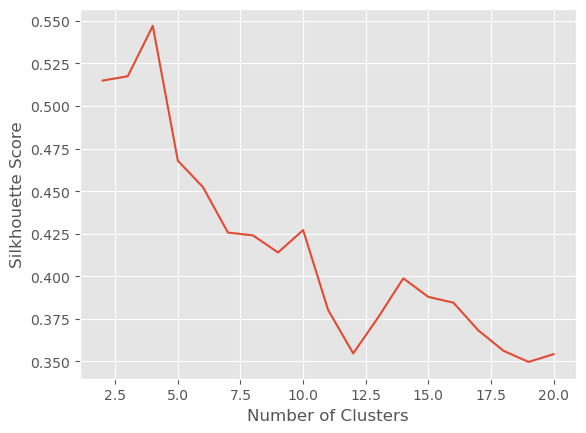

In [6]:
scaler = MinMaxScaler()
sil = list()

for i in range(2, 21):

    #clustering data
    kmeans_md = Pipeline([('stand', MinMaxScaler()),
                          ('kmeans', KMeans(n_clusters = i, n_init = 20, random_state = 1))]).fit(customers)

    #Compute silhouette
    cluster_labels = kmeans_md['kmeans'].labels_
    sil.append(silhouette_score(scaler.fit_transform(customers), cluster_labels))

#Visualize results
plt.plot([i for i in range(2, 21)], sil)
plt.xlabel('Number of Clusters')
plt.ylabel('Silkhouette Score')

In [7]:
X = scaler.fit_transform(customers)

#Cluster data into 4 cluster using fuzzy clustering
fc, W, u0, d, jm, p, pc = cmeans(X.T, c = 4, m = 1.25, error = 1e-6, maxiter = 1000)

In [8]:
customers['cluster'] = np.nan

#Likelihood to labels
customers['cluster'] = np.where(W[0] > 0.7, 1, customers['cluster'])
customers['cluster'] = np.where(W[1] > 0.7, 2, customers['cluster'])
customers['cluster'] = np.where(W[2] > 0.7, 3, customers['cluster'])
customers['cluster'] = np.where(W[3] > 0.7, 4, customers['cluster'])

customers.head()

,Visit_Time,Average_Expense,Sex,Age,cluster
0,3,5.7,0,10,1.0
1,5,14.5,0,27,1.0
2,16,33.5,0,32,2.0
3,5,15.9,0,30,1.0
4,16,24.9,0,23,2.0


In [9]:
customers['cluster'].value_counts()

cluster
3.0    24
4.0    16
1.0    11
2.0     8
Name: count, dtype: int64